# Fiddler Classic - [April 19, 2024](https://thefiddler.substack.com/p/can-you-win-the-collaborative-card)


## Problem
_You and a friend each have a standard deck with 52 cards. You thoroughly shuffle your deck, while your friend thoroughly shuffles theirs. Then, you both draw cards one at a time. If the first card you draw is the same as the first card your friend draws, you lose! Otherwise, you draw again. If the next card you draw is the same as the next card your friend draws, you lose! Otherwise … and so on. If the two of you can make it through your entire decks without ever drawing the same card at the same time, you both win. Otherwise, you both lose. What is the probability that you and your friend will win this collaborative game?_

## Solution

Let's start intuitively with probability. The chance of us drawing the same card on the first pull is $\frac{1}{52}$. Otherwise the game continues. Since we know that we each pulled a different card, there are only 50 common cards we still have in our deck (even though we still have 51 cards). So the probability of us having the same card on the second pull is $\frac{51}{52} \left( \frac{50}{51}\frac{1}{50} + \frac{1}{51}\frac{1}{1}$. Hopefully we can already start to see how this is getting a little complicated.  If we consider the probability of pulling the same card on the third pull, we have to consider three different scenarios since they will impact the numer of "danger" cards in each of our decks, and thus the probability of us advancing. Let's call the cards we've pulled already "the pool".
1. None of the cards pulled on the second round matched any cards in the pool (best scenario)
2. One of the cards pulled has a match in the pool
3. Both of the cards pulled matched with a card in the pool. 

Accounting for all of these is going to start getting dedious and as we continue to each round, we'd need to account for all possible number of completed matches in the pool and the probability they occur.  Yikes!

But thankfully there's an easier way!

Let's instead think of each deck as an ordered set with elements $\{1, \cdots, 52\}$ but they can appear in any order. If we think about the whole game at once, the condition we need to win is for every element at position $i$ in deck 1 to be different than the element at position $i$ in deck 2. If we think about this in terms of mappings, we need a bijective map that takes every element to a position other than they one it started in. In fact, there's a name for such mappings; a [derangement](https://en.wikipedia.org/wiki/Derangement)! And there are some nice tidy formulas for counting derangements! Derangements are often times denoted as $!n$ for a set of $n$ elements and can be counted with the following formula.

$$!n = n! \sum_{k=0}^n \frac{(-1)^k}{k!}$$

or with the recurrence relation

$$!n = n \cdot !(n-1) + (-1)^n$$

With a derangement now at our disposal, finding the probability of winning our game should be pretty easy. It's simply

$$\frac{!52}{52!} \equiv \frac{\text{win condition}}{\text{total possible configurations}}$$

$$\frac{n! \sum_{k=0}^n \frac{(-1)^k}{k!}}{n!} = \sum_{k=0}^n \frac{(-1)^k}{k!}$$

We calculate this quantity below

In [49]:
import numpy as np
from math import factorial, comb

def derangement_prob(n):
    total = 0
    for k in range(n+1):
        total += (-1)**k / factorial(k)
    return total

print(derangement_prob(52))

0.36787944117144245


Let's check with a simulation

In [39]:
# Run simple simulation with multiprocessing
import multiprocessing
import time

def play_game(n):
    np.random.seed((int(time.time() * 1000) + n) % 4294967295)
    # shuffle two decks of 52 cards
    deck_size = 52
    deck1 = np.arange(deck_size)
    np.random.shuffle(deck1)
    deck2 = np.arange(deck_size)
    np.random.shuffle(deck2)

    # Check if any cards are in the same position
    return np.any(deck1 == deck2)


start = time.time()
with multiprocessing.Pool() as pool:
    results = pool.map(play_game, range(10000000))

print("Probability of winning: ", 1 - np.mean(results))
print("Time to run: ", time.time() - start)

Probability of winning:  0.36783710000000003
Time to run:  19.568192720413208


# Extra Credit

## Problem
_Once again, you and your friend both have standard decks of 52 cards. This time, you first combine them into a single deck with 104 cards, and you thoroughly shuffle it. Then, you randomly split this back into two decks with 52 cards each—one for you, and one for your friend. At this point, you continue as before, with each of you drawing one card at a time. If the two of you can make it through your entire decks without ever drawing the same card at the same time, you both win. Otherwise, you both lose. What is the probability that you and your friend will win this collaborative game?_


## Solution

If we consider for a moment what makes this variation more complicated, its that we no longer know if every card in a deck is unique. Interestingly though, this actually helps us since duplicate cards in one deck means the other deck _can't_ have that card and so they're guaranteed to be safe when we draw them! This effectively removes two "danger" cards from the deck. More specifically, if there was exactly one pair of cards in deck 1, then we only need to consider 50 cards and the probability of winning would then be $\frac{!50}{50!}$ (same as before but with 2 cards removed since those are guaranteed to be safe). Similary, if there's two pairs in deck 1, 4 cards are now save and the probability of winning is $\frac{!48}{48!}$. 

So now, if we just had a way of calculating the probability of there being $i$ pairs in a given deck, we can finish solving this problem. 

Let's consider the case with one pair:

1. Ouf of the 52 possible pairs from the combined deck, we need one complete pair: $52 \choose 1$
2. We now have 50 more cards to fill our deck with. They must all be unique. There are 51 remaining pairs in the combined deck. So we must take one card from 50 piles out of a possible 51 options: $51 \choose 50$
3. When grabbing from each of those 50 piles, there are two options: $2^50$

So overall the number of possible ways of being dealt a deck with exactly 1 pair from two combined decks is 

$${52 \choose 1} {51 \choose 50} 2^{50}$$

Similarily for two pairs:

1. Ouf of the 52 possible pairs from the combined deck, we need two complete pairs: $52 \choose 2$
2. We now have 48 more cards to fill our deck with. They must all be unique. There are 50 remaining pairs in the combined deck. So we must take one card from 48 piles out of a possible 50 options: $50 \choose 48$
3. When grabbing from each of those 48 piles, there are two options: $2^48$

So overall the number of possible ways of being dealt a deck with exactly 2 pairs from two combined decks is 

$${52 \choose 2} {50 \choose 48} 2^{48}$$

More generally, the number of ways of being dealt $i$ pairs from two combined decks is

$${52 \choose i} {52-i \choose 52-2i} 2^{52-2i}$$

The total number of ways we can deal out a deck is

$${104 \choose 52}$$

So the probability of dealing exactly $i$ pairs is 

$$\frac{{52 \choose i} {52-i \choose 52-2i} 2^{52-2i}}{104 \choose 52} = \frac{(52!)^3 \cdot 2^{52-2i}}{(i!)^2 \cdot (52-2i)! \cdot 104!}$$

Now we just need to couple this with the derangements (account for the fact that for a given number of pairs $p$ there are only $52-2p$ "danger" cards).

$$\sum_{i=0}^{26} \frac{{52 \choose i} {52-i \choose 52-2i} 2^{52-2i}}{104 \choose 52}  \frac{!(52-2i)}{(52-2i)!}$$

Now we could compute this (and we will to verify) but if take a closer look at the last term in the sum (i.e. the derangement of $52-2i$ over $(52-2i)!$) we can observe that this ratio converges very quickly.

Text(0, 0.5, 'Probability')

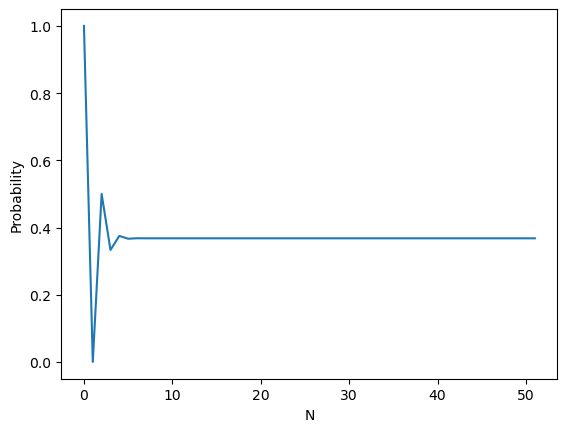

In [40]:
from matplotlib import pyplot as plt

der_ratio_vals = []
for n in range(52):
    der_ratio_vals.append(derangement_prob(n))

plt.plot(der_ratio_vals)
plt.xlabel("N")
plt.ylabel("Probability")

With this in mind, it basically doesn't matter what the probability of certain pairs appearing is since different numbers of pairs effectively just changes the size of the deck we need to be concerned about. But since the probability of winning is mostly independent of deck size after about $N=5$, the answer is basically the same!!

Here is a quick computation to confirm that.

In [52]:
from math import factorial, comb



And a quick simulation to verify the whole extra credit solution

In [42]:
def play_ec_game(n):
    np.random.seed((int(time.time() * 1000) + n) % 4294967295)
    # combine two decks of 52 cards
    deck_size = 52
    deck = np.concatenate((np.arange(deck_size), np.arange(deck_size)))
    np.random.shuffle(deck)

    # Seperate the two decks
    deck1 = deck[:deck_size]
    deck2 = deck[deck_size:]
    return np.any(deck1 == deck2)

start = time.time()
with multiprocessing.Pool() as pool:
    results = pool.map(play_ec_game, range(10000000))

print("Probability of winning: ", 1 - np.mean(results))
print("Time to run: ", time.time() - start)

Probability of winning:  0.6037722
Time to run:  21.369954586029053
